In [2]:
import sys
!{sys.executable} -m pip install pandasql

In [3]:
import pandas as pd
import pandasql as psql
import matplotlib.pyplot as plt

## Retail prices of products dataset:

- This dataset contains monthly retail price data for a wide range of consumer products sold in various Canadian provinces over several years. It has been enriched with tax, category, and classification metadata for deeper insights.

## Columns: 
- Year: Reference Year
- Month: Reference Month
- GEO: Geographic region (encoded as Province 1, Province 2, etc.)
- Products: Name of the retail product
- COORDINATE: Internal coordinate identifier for product
- VALUE: Original product price per unit (before tax)
- Taxable: 'Yes' if the product is subject to tax, 'No' otherwise
- Total tax rate: Total tax rate (%) based on province or average for 'Canada'
- Value after tax: Price after tax if taxable, else same as VALUE.
- Product Category: High-level category assigned to the product.
- Essential: 'Essential' for basic needs or 'Non-Essential'    

In [5]:
df = pd.read_excel("Retail_Prices_of _Products.xlsx")

In [7]:
df

,Year,Month,GEO,Product Category,VALUE,Taxable,Total tax rate,Value after tax,Essential
0,2017,January,Province 1,Meat & Poultry,12.66,No,11.0,12.66,Essential
1,2017,January,Province 1,Meat & Poultry,21.94,No,11.0,21.94,Essential
2,2017,January,Province 1,Meat & Poultry,13.44,No,11.0,13.44,Essential
3,2017,January,Province 1,Meat & Poultry,20.17,No,11.0,20.17,Essential
4,2017,January,Province 1,Meat & Poultry,9.12,No,11.0,9.12,Essential
...,...,...,...,...,...,...,...,...,...
118477,2025,February,Province 11,Nuts & Snacks,4.50,No,12.0,4.50,Non-Essential
118478,2025,February,Province 11,Toiletries & Cleaning,8.07,Yes,12.0,9.04,Essential
118479,2025,February,Province 11,Toiletries & Cleaning,4.13,Yes,12.0,4.63,Essential
118480,2025,February,Province 11,Toiletries & Cleaning,7.18,Yes,12.0,8.04,Essential


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118482 entries, 0 to 118481
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              118482 non-null  int64  
 1   Month             118482 non-null  object 
 2   GEO               118482 non-null  object 
 3   Product Category  118482 non-null  object 
 4   VALUE             118482 non-null  float64
 5   Taxable           118482 non-null  object 
 6   Total tax rate    118482 non-null  float64
 7   Value after tax   118482 non-null  float64
 8   Essential         118482 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 8.1+ MB


In [8]:
df["Total tax rate"] = df["Total tax rate"].astype("int64")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118482 entries, 0 to 118481
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              118482 non-null  int64  
 1   Month             118482 non-null  object 
 2   GEO               118482 non-null  object 
 3   Product Category  118482 non-null  object 
 4   VALUE             118482 non-null  float64
 5   Taxable           118482 non-null  object 
 6   Total tax rate    118482 non-null  int64  
 7   Value after tax   118482 non-null  float64
 8   Essential         118482 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 8.1+ MB


In [16]:
df

,Year,Month,GEO,Product Category,VALUE,Taxable,Total tax rate,Value after tax,Essential
0,2017,January,Province 1,Meat & Poultry,12.66,No,11,12.66,Essential
1,2017,January,Province 1,Meat & Poultry,21.94,No,11,21.94,Essential
2,2017,January,Province 1,Meat & Poultry,13.44,No,11,13.44,Essential
3,2017,January,Province 1,Meat & Poultry,20.17,No,11,20.17,Essential
4,2017,January,Province 1,Meat & Poultry,9.12,No,11,9.12,Essential
...,...,...,...,...,...,...,...,...,...
118477,2025,February,Province 11,Nuts & Snacks,4.50,No,12,4.50,Non-Essential
118478,2025,February,Province 11,Toiletries & Cleaning,8.07,Yes,12,9.04,Essential
118479,2025,February,Province 11,Toiletries & Cleaning,4.13,Yes,12,4.63,Essential
118480,2025,February,Province 11,Toiletries & Cleaning,7.18,Yes,12,8.04,Essential


## Goals: 
- What is the most valuable product categories?
- Examine inflation on essentials vs non-essentials over time.
- Understand how tax laws affect consumer pricing by region.
- Identify high-cost vs low-cost essentials for better planning.
- Year-over-Year Growth: Measure the year-over-year growth in the total value after tax for both essential and non-essential categories.
- Taxable vs Non-Taxable Products Analysis: Examine the performance of taxable vs non-taxable products to see how they differ in terms of pricing and demand.

## Goal 1: What is the most valuable product categories?

In [20]:
Price = """SELECT Year, Month, GEO, "Product Category", VALUE, Taxable, "Total tax rate", "Value after tax", Essential FROM df"""

In [22]:
df_Price = psql.sqldf(Price, globals())

In [23]:
df_Price

,Year,Month,GEO,Product Category,VALUE,Taxable,Total tax rate,Value after tax,Essential
0,2017,January,Province 1,Meat & Poultry,12.66,No,11,12.66,Essential
1,2017,January,Province 1,Meat & Poultry,21.94,No,11,21.94,Essential
2,2017,January,Province 1,Meat & Poultry,13.44,No,11,13.44,Essential
3,2017,January,Province 1,Meat & Poultry,20.17,No,11,20.17,Essential
4,2017,January,Province 1,Meat & Poultry,9.12,No,11,9.12,Essential
...,...,...,...,...,...,...,...,...,...
118477,2025,February,Province 11,Nuts & Snacks,4.50,No,12,4.50,Non-Essential
118478,2025,February,Province 11,Toiletries & Cleaning,8.07,Yes,12,9.04,Essential
118479,2025,February,Province 11,Toiletries & Cleaning,4.13,Yes,12,4.63,Essential
118480,2025,February,Province 11,Toiletries & Cleaning,7.18,Yes,12,8.04,Essential


In [26]:
df[["Product Category"]]

,Product Category
0,Meat & Poultry
1,Meat & Poultry
2,Meat & Poultry
3,Meat & Poultry
4,Meat & Poultry
...,...
118477,Nuts & Snacks
118478,Toiletries & Cleaning
118479,Toiletries & Cleaning
118480,Toiletries & Cleaning


In [28]:
df_group = df.groupby("Product Category")["Value after tax"].sum().reset_index()

In [30]:
df_group

,Product Category,Value after tax
0,Beverages,10506.96
1,Canned & Jarred Goods,30103.87
2,Cooking Essentials,44444.35
3,Dairy & Eggs,51799.21
4,Frozen Foods,15736.18
5,Fruits,57883.71
6,Grains & Bakery,43885.82
7,Infant & Baby Products,36060.73
8,Legumes & Dry Goods,10115.06
9,Meat & Poultry,222355.26


In [32]:
df_category = df_group.sort_values(by = "Value after tax", ascending = False)

In [34]:
df_category

,Product Category,Value after tax
9,Meat & Poultry,222355.26
12,Vegetables,81843.36
5,Fruits,57883.71
3,Dairy & Eggs,51799.21
2,Cooking Essentials,44444.35
6,Grains & Bakery,43885.82
7,Infant & Baby Products,36060.73
11,Toiletries & Cleaning,34869.65
1,Canned & Jarred Goods,30103.87
4,Frozen Foods,15736.18


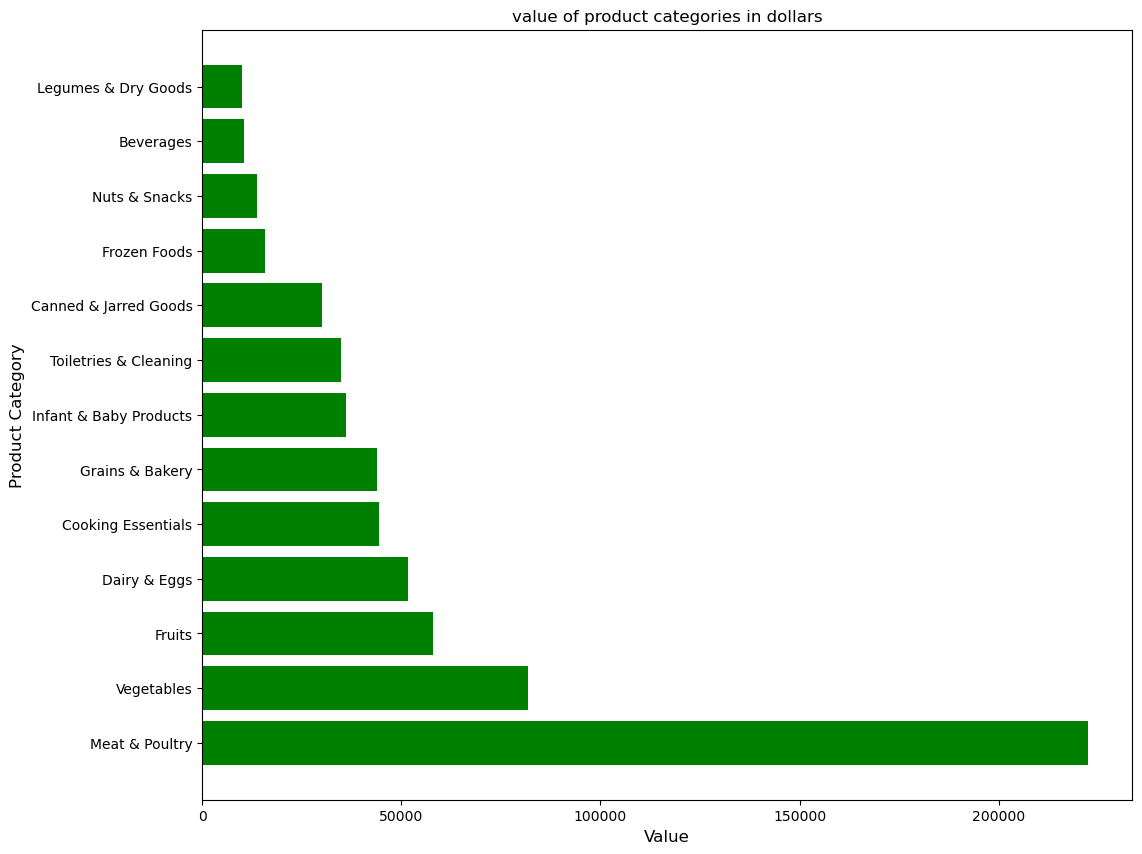

In [36]:
plt.figure(figsize = (12, 10))
plt.barh(df_category["Product Category"], df_category["Value after tax"], color = "green")
plt.xlabel("Value", size = 12)
plt.ylabel("Product Category", size = 12)
plt.title("value of product categories in dollars")
plt.show()

## Conclusions: 
- Meat Products are the most valuable products in the market , followed by Vegetables , Fruits, Dairy products , eggs , Cooking essentials, Grains and bakery. 
- These product categories have 1 thing in common: they are food products that are essential for people's health (Meat, Vegetables, Fruits, Dairy products, Eggs, Grains and bakery) and households (Cooking essentials).

## Goal 2: Examine inflation on essentials vs non-essentials over time.

In [40]:
df

,Year,Month,GEO,Product Category,VALUE,Taxable,Total tax rate,Value after tax,Essential
0,2017,January,Province 1,Meat & Poultry,12.66,No,11,12.66,Essential
1,2017,January,Province 1,Meat & Poultry,21.94,No,11,21.94,Essential
2,2017,January,Province 1,Meat & Poultry,13.44,No,11,13.44,Essential
3,2017,January,Province 1,Meat & Poultry,20.17,No,11,20.17,Essential
4,2017,January,Province 1,Meat & Poultry,9.12,No,11,9.12,Essential
...,...,...,...,...,...,...,...,...,...
118477,2025,February,Province 11,Nuts & Snacks,4.50,No,12,4.50,Non-Essential
118478,2025,February,Province 11,Toiletries & Cleaning,8.07,Yes,12,9.04,Essential
118479,2025,February,Province 11,Toiletries & Cleaning,4.13,Yes,12,4.63,Essential
118480,2025,February,Province 11,Toiletries & Cleaning,7.18,Yes,12,8.04,Essential


In [42]:
df[["Value after tax", "Essential", "Year"]]

,Value after tax,Essential,Year
0,12.66,Essential,2017
1,21.94,Essential,2017
2,13.44,Essential,2017
3,20.17,Essential,2017
4,9.12,Essential,2017
...,...,...,...
118477,4.50,Non-Essential,2025
118478,9.04,Essential,2025
118479,4.63,Essential,2025
118480,8.04,Essential,2025


In [44]:
df_inflation = df.groupby(["Essential", "Year"])["Value after tax"].mean().reset_index()

In [46]:
df_inflation

,Essential,Year,Value after tax
0,Essential,2017,5.044722
1,Essential,2018,5.080658
2,Essential,2019,5.275244
3,Essential,2020,5.469435
4,Essential,2021,5.682485
5,Essential,2022,6.282775
6,Essential,2023,6.741406
7,Essential,2024,6.829775
8,Essential,2025,6.933955
9,Non-Essential,2017,3.600299


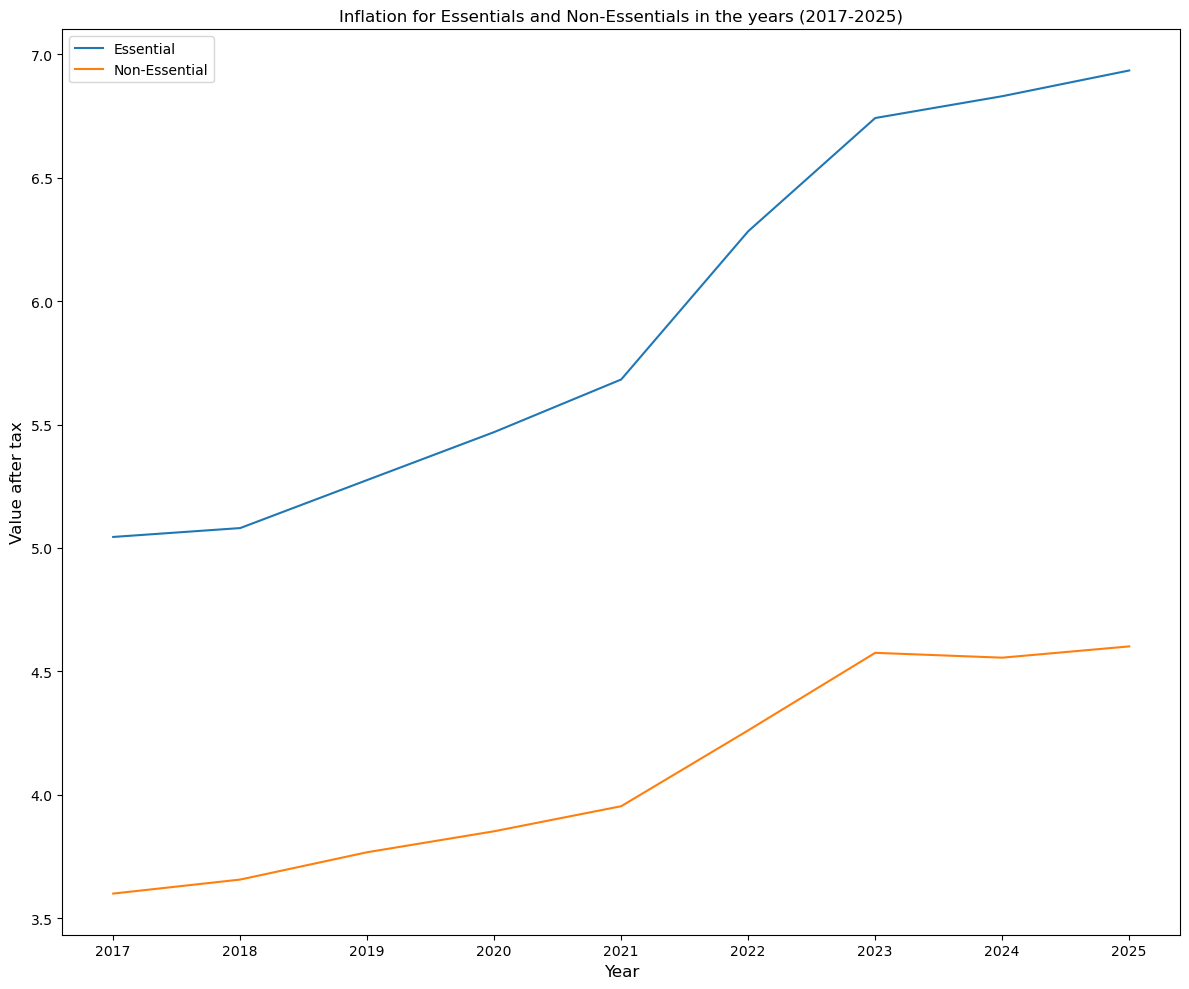

In [48]:
plt.figure(figsize = (12, 10))
df_essential = df_inflation[df_inflation["Essential"] == "Essential"]
plt.plot(df_essential["Year"], df_essential["Value after tax"], label = "Essential")
df_non_essential = df_inflation[df_inflation["Essential"] == "Non-Essential"]
plt.plot(df_non_essential["Year"], df_non_essential["Value after tax"], label = "Non-Essential")
plt.xlabel("Year", size = 12)
plt.ylabel("Value after tax", size = 12)
plt.title("Inflation for Essentials and Non-Essentials in the years (2017-2025)")
plt.legend()
plt.tight_layout()
plt.show()

## Conclusions:
- Essential products are the most affected by inflation.
- Non-Essential products are the least affected by inflation.
- As the purchasing power decreases in inflation times, the purchasing power for products especially Essential ones decreases.

## Goal 3: Understand how tax laws affect consumer pricing by region.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118482 entries, 0 to 118481
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              118482 non-null  int64  
 1   Month             118482 non-null  object 
 2   GEO               118482 non-null  object 
 3   Product Category  118482 non-null  object 
 4   VALUE             118482 non-null  float64
 5   Taxable           118482 non-null  object 
 6   Total tax rate    118482 non-null  int64  
 7   Value after tax   118482 non-null  float64
 8   Essential         118482 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 8.1+ MB


In [54]:
df[["GEO", "Total tax rate", "Value after tax"]]

,GEO,Total tax rate,Value after tax
0,Province 1,11,12.66
1,Province 1,11,21.94
2,Province 1,11,13.44
3,Province 1,11,20.17
4,Province 1,11,9.12
...,...,...,...
118477,Province 11,12,4.50
118478,Province 11,12,9.04
118479,Province 11,12,4.63
118480,Province 11,12,8.04


In [56]:
df_tax = """SELECT GEO, "Total tax rate", "Value after tax" FROM df
GROUP BY GEO"""

In [58]:
tax = psql.sqldf(df_tax, globals())

In [59]:
tax

,GEO,Total tax rate,Value after tax
0,Province 1,11,12.66
1,Province 10,5,12.77
2,Province 11,12,12.56
3,Province 2,15,13.57
4,Province 3,15,13.33
5,Province 4,15,13.12
6,Province 5,15,13.33
7,Province 6,14,12.20
8,Province 7,13,12.67
9,Province 8,12,12.38


In [62]:
tax1 = tax.sort_values(by = "GEO", ascending = True)

In [64]:
tax1

,GEO,Total tax rate,Value after tax
0,Province 1,11,12.66
1,Province 10,5,12.77
2,Province 11,12,12.56
3,Province 2,15,13.57
4,Province 3,15,13.33
5,Province 4,15,13.12
6,Province 5,15,13.33
7,Province 6,14,12.20
8,Province 7,13,12.67
9,Province 8,12,12.38


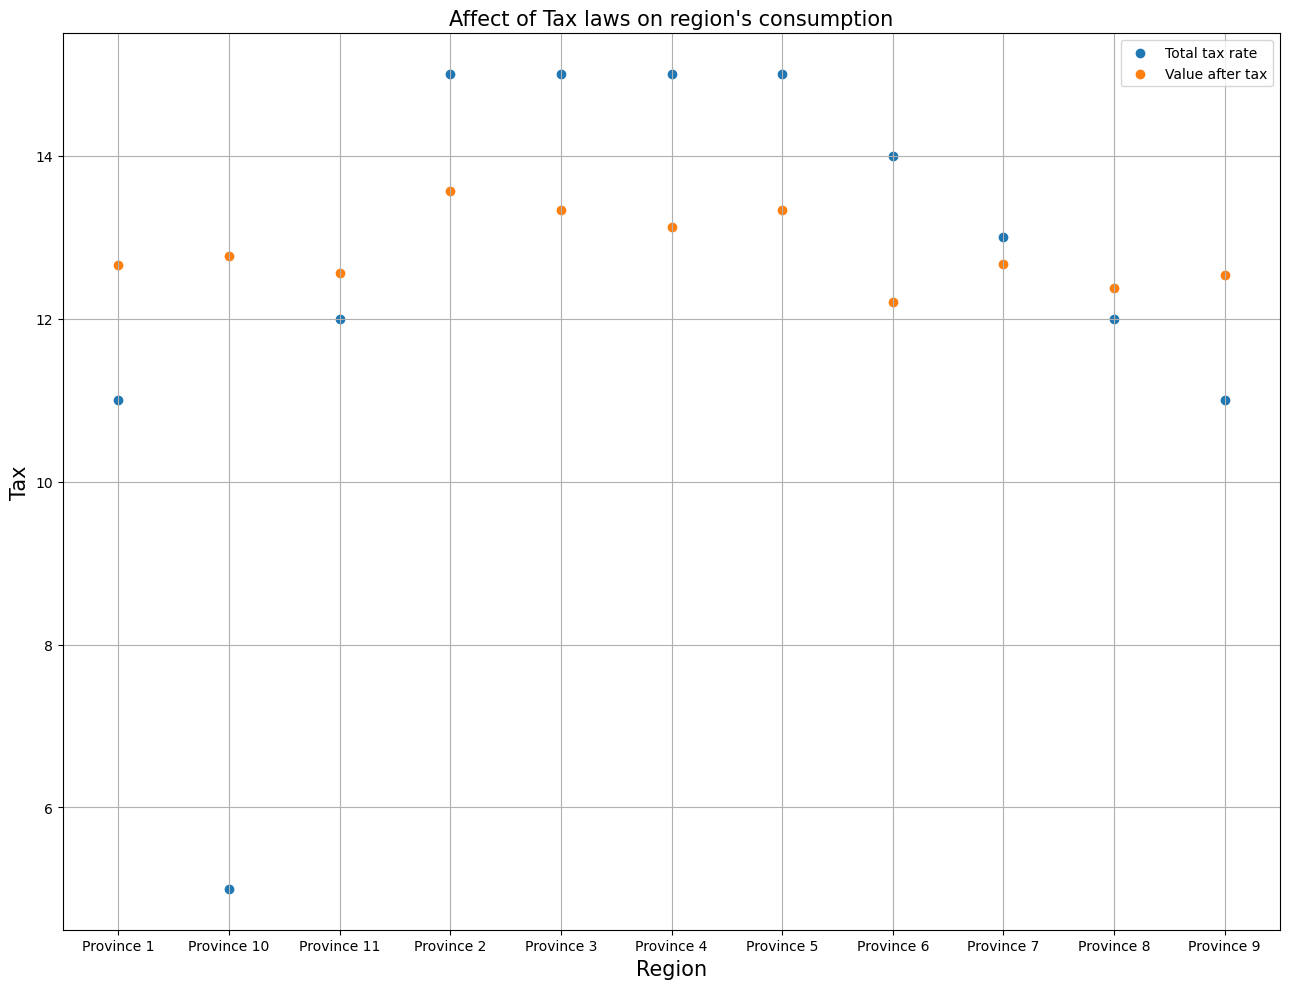

In [66]:
plt.figure(figsize = (13, 10))
plt.scatter(tax["GEO"], tax["Total tax rate"], label = "Total tax rate")
plt.scatter(tax["GEO"], tax["Value after tax"], label = "Value after tax")
plt.xlabel("Region", size = 15)
plt.ylabel("Tax", size = 15)
plt.title("Affect of Tax laws on region's consumption", size = 15)
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

## Conclusions:
- Province 2, Province 3, Province 4 and Province 5 have high tax rates, followed by province 6.
- However these region vary with product values after tax, Province 2 has high value after tax while Province 3 and Province 4 have slightly lower value after tax but Province 5 is slightly higher than the previous 2 regions.
- Although Province 10 has the lowest tax rate, it surprisingly has the highest value after tax, this has to do with supply and demand and product types.
- Province 11 and Province 8 have slightly different values after tax(12.56, 12.38 respectively) but the same tax rate (12%).

## Goal 4: Identify high-cost vs low-cost essentials for better planning

In [70]:
df

,Year,Month,GEO,Product Category,VALUE,Taxable,Total tax rate,Value after tax,Essential
0,2017,January,Province 1,Meat & Poultry,12.66,No,11,12.66,Essential
1,2017,January,Province 1,Meat & Poultry,21.94,No,11,21.94,Essential
2,2017,January,Province 1,Meat & Poultry,13.44,No,11,13.44,Essential
3,2017,January,Province 1,Meat & Poultry,20.17,No,11,20.17,Essential
4,2017,January,Province 1,Meat & Poultry,9.12,No,11,9.12,Essential
...,...,...,...,...,...,...,...,...,...
118477,2025,February,Province 11,Nuts & Snacks,4.50,No,12,4.50,Non-Essential
118478,2025,February,Province 11,Toiletries & Cleaning,8.07,Yes,12,9.04,Essential
118479,2025,February,Province 11,Toiletries & Cleaning,4.13,Yes,12,4.63,Essential
118480,2025,February,Province 11,Toiletries & Cleaning,7.18,Yes,12,8.04,Essential


In [76]:
Essential = df.loc[df["Essential"] == "Essential"]

In [78]:
Essential

,Year,Month,GEO,Product Category,VALUE,Taxable,Total tax rate,Value after tax,Essential
0,2017,January,Province 1,Meat & Poultry,12.66,No,11,12.66,Essential
1,2017,January,Province 1,Meat & Poultry,21.94,No,11,21.94,Essential
2,2017,January,Province 1,Meat & Poultry,13.44,No,11,13.44,Essential
3,2017,January,Province 1,Meat & Poultry,20.17,No,11,20.17,Essential
4,2017,January,Province 1,Meat & Poultry,9.12,No,11,9.12,Essential
...,...,...,...,...,...,...,...,...,...
118473,2025,February,Province 11,Grains & Bakery,3.10,No,12,3.10,Essential
118478,2025,February,Province 11,Toiletries & Cleaning,8.07,Yes,12,9.04,Essential
118479,2025,February,Province 11,Toiletries & Cleaning,4.13,Yes,12,4.63,Essential
118480,2025,February,Province 11,Toiletries & Cleaning,7.18,Yes,12,8.04,Essential


In [80]:
Essential[["Product Category", "Value after tax", "Essential"]]

,Product Category,Value after tax,Essential
0,Meat & Poultry,12.66,Essential
1,Meat & Poultry,21.94,Essential
2,Meat & Poultry,13.44,Essential
3,Meat & Poultry,20.17,Essential
4,Meat & Poultry,9.12,Essential
...,...,...,...
118473,Grains & Bakery,3.10,Essential
118478,Toiletries & Cleaning,9.04,Essential
118479,Toiletries & Cleaning,4.63,Essential
118480,Toiletries & Cleaning,8.04,Essential


In [82]:
Essential_products = """SELECT "Product Category", SUM("Value after tax") AS "Total value after tax", Essential from Essential
GROUP BY "Product Category"
"""

In [84]:
Products_Essential = psql.sqldf(Essential_products, globals())

In [86]:
Products_Essential

,Product Category,Total value after tax,Essential
0,Canned & Jarred Goods,11960.63,Essential
1,Cooking Essentials,44444.35,Essential
2,Dairy & Eggs,51799.21,Essential
3,Fruits,57883.71,Essential
4,Grains & Bakery,36523.11,Essential
5,Infant & Baby Products,36060.73,Essential
6,Legumes & Dry Goods,10115.06,Essential
7,Meat & Poultry,208051.49,Essential
8,Toiletries & Cleaning,34869.65,Essential
9,Vegetables,79037.97,Essential


In [88]:
Arrange_Essentials = Products_Essential.sort_values(by = "Total value after tax", ascending = False)

In [90]:
Arrange_Essentials

,Product Category,Total value after tax,Essential
7,Meat & Poultry,208051.49,Essential
9,Vegetables,79037.97,Essential
3,Fruits,57883.71,Essential
2,Dairy & Eggs,51799.21,Essential
1,Cooking Essentials,44444.35,Essential
4,Grains & Bakery,36523.11,Essential
5,Infant & Baby Products,36060.73,Essential
8,Toiletries & Cleaning,34869.65,Essential
0,Canned & Jarred Goods,11960.63,Essential
6,Legumes & Dry Goods,10115.06,Essential


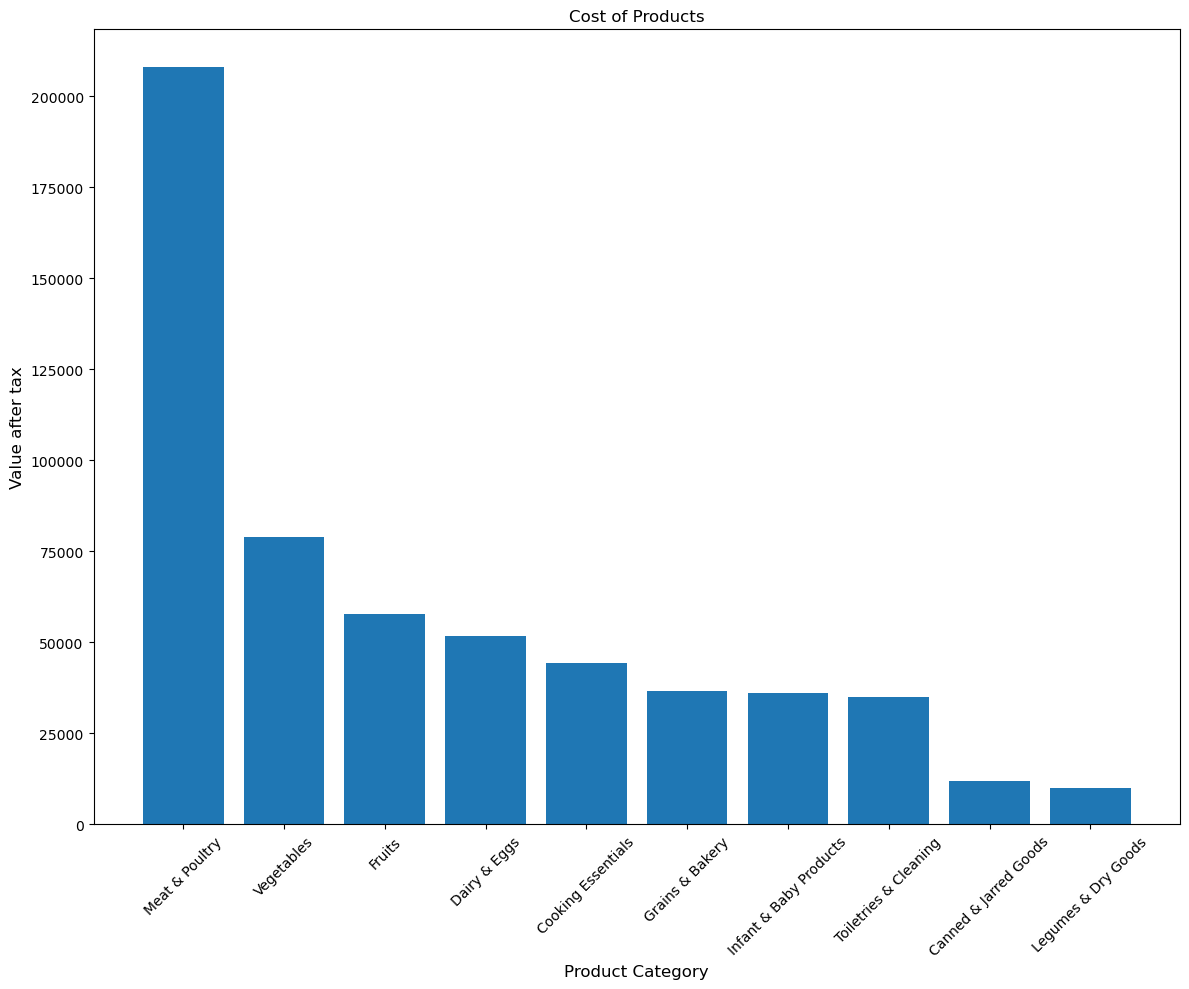

In [92]:
plt.figure(figsize = (12, 10))
plt.bar(Arrange_Essentials["Product Category"], Arrange_Essentials["Total value after tax"])
plt.xlabel("Product Category", size = 12)
plt.xticks(rotation = 45)
plt.ylabel("Value after tax", size = 12)
plt.title("Cost of Products", size = 12)
plt.tight_layout()
plt.show()

## Conclusions: 
- We should increase our supply of Essential products be it: Food products (Meat, Vegetables, Fruits, Milk products, Eggs, Grains and Bakery) and household tools (Cooking essentials, Baby products and Cleaning tools). 

## Goal 5: Year-over-Year Growth: Measure the year-over-year growth in the total value after tax for both essential and non-essential categories.

In [181]:
df

,Year,Month,GEO,Product Category,VALUE,Taxable,Total tax rate,Value after tax,Essential
0,2017,January,Province 1,Meat & Poultry,12.66,No,11,12.66,Essential
1,2017,January,Province 1,Meat & Poultry,21.94,No,11,21.94,Essential
2,2017,January,Province 1,Meat & Poultry,13.44,No,11,13.44,Essential
3,2017,January,Province 1,Meat & Poultry,20.17,No,11,20.17,Essential
4,2017,January,Province 1,Meat & Poultry,9.12,No,11,9.12,Essential
...,...,...,...,...,...,...,...,...,...
118477,2025,February,Province 11,Nuts & Snacks,4.50,No,12,4.50,Non-Essential
118478,2025,February,Province 11,Toiletries & Cleaning,8.07,Yes,12,9.04,Essential
118479,2025,February,Province 11,Toiletries & Cleaning,4.13,Yes,12,4.63,Essential
118480,2025,February,Province 11,Toiletries & Cleaning,7.18,Yes,12,8.04,Essential


In [187]:
Growth = """SELECT "Year", "Essential", SUM("Value after tax") AS "Total value after tax" FROM df
GROUP BY "Year" , "Essential"
ORDER BY 'Year'"""

In [189]:
Year_growth = psql.sqldf(Growth, globals())

In [191]:
Year_growth

,Year,Essential,Total value after tax
0,2017,Essential,60536.66
1,2017,Non-Essential,9029.55
2,2018,Essential,60967.90
3,2018,Non-Essential,9171.75
4,2019,Essential,63302.93
5,2019,Non-Essential,9449.42
6,2020,Essential,65633.22
7,2020,Non-Essential,9662.52
8,2021,Essential,68189.82
9,2021,Non-Essential,9916.88


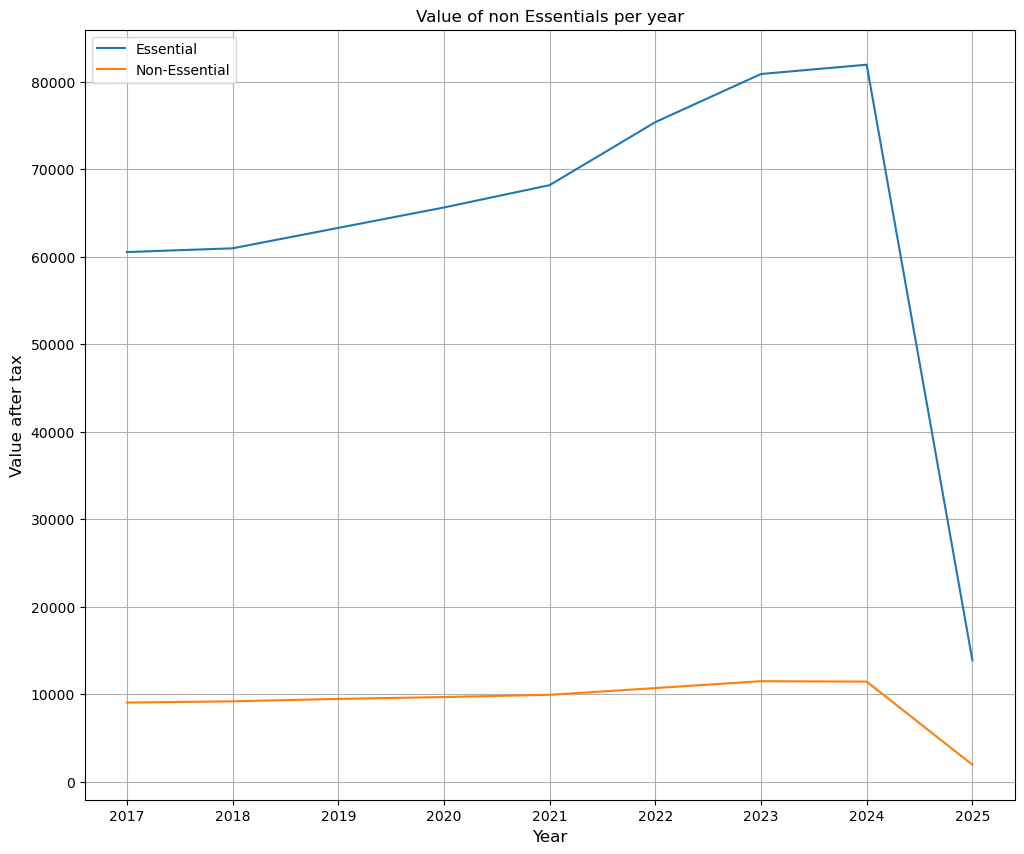

In [201]:
plt.figure(figsize = (12, 10))
Essential = Year_growth[Year_growth["Essential"] == "Essential"]
plt.plot(Essential["Year"], Essential["Total value after tax"], label = "Essential")
plt.xlabel("Year", size = 12)
plt.ylabel("Value after tax", size = 12)
plt.title("Value of Essentials per year")
Non_Essential = Year_growth[Year_growth["Essential"] == "Non-Essential"]
plt.plot(Non_Essential["Year"], Non_Essential["Total value after tax"], label = "Non-Essential")
plt.xlabel("Year", size = 12)
plt.ylabel("Value after tax", size = 12)
plt.title("Value of non Essentials per year")
plt.grid()
plt.legend()
plt.show()

## Conclusions:
- The value of essential products is increasing, this shows that there's a huge demand for Essential products.
- The essential products have the highest value per year while the Non-Essential products have the lowest value per year.
- 2024 is the peak year for the value of essential products.
- Surprsingly, 2024 is the same peak year for the value of non essential products.

## Goal 6: Taxable vs Non-Taxable Products Analysis: Examine the performance of taxable vs non-taxable products to see how they differ in terms of pricing and demand.

In [52]:
Tax = """SELECT "Taxable", SUM("Value after tax") AS "Total value after tax", "Product Category", Essential
FROM df
GROUP BY "Taxable", "Product Category"
"""

In [54]:
Tax1 = psql.sqldf(Tax, globals())

In [55]:
Tax1

,Taxable,Total value after tax,Product Category,Essential
0,No,10506.96,Beverages,Non-Essential
1,No,15829.02,Canned & Jarred Goods,Non-Essential
2,No,44444.35,Cooking Essentials,Essential
3,No,51799.21,Dairy & Eggs,Essential
4,No,10525.31,Frozen Foods,Non-Essential
5,No,57883.71,Fruits,Essential
6,No,37230.41,Grains & Bakery,Essential
7,No,36060.73,Infant & Baby Products,Essential
8,No,10115.06,Legumes & Dry Goods,Essential
9,No,203862.14,Meat & Poultry,Essential


In [58]:
Tax2 = Tax1.sort_values(by = "Total value after tax", ascending = False)

In [60]:
Tax2

,Taxable,Total value after tax,Product Category,Essential
9,No,203862.14,Meat & Poultry,Essential
11,No,78679.54,Vegetables,Non-Essential
5,No,57883.71,Fruits,Essential
3,No,51799.21,Dairy & Eggs,Essential
2,No,44444.35,Cooking Essentials,Essential
6,No,37230.41,Grains & Bakery,Essential
7,No,36060.73,Infant & Baby Products,Essential
16,Yes,34869.65,Toiletries & Cleaning,Essential
15,Yes,18493.12,Meat & Poultry,Essential
1,No,15829.02,Canned & Jarred Goods,Non-Essential


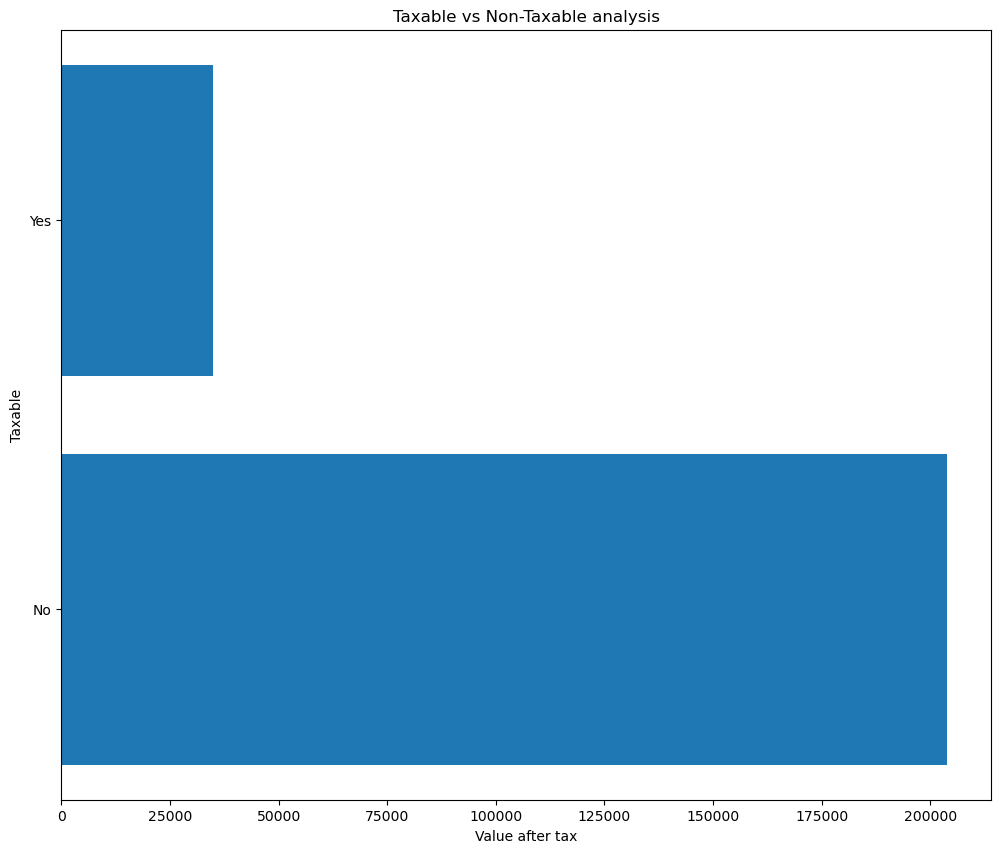

In [40]:
plt.figure(figsize = (12, 10))
plt.barh(Tax1["Taxable"], Tax1["Total value after tax"])
plt.xlabel("Value after tax")
plt.ylabel("Taxable")
plt.title("Taxable vs Non-Taxable analysis")
plt.show()

# Conclusions:
- Non taxable products have higher value than taxable products, this shows that most consumer spending is directed towards products exempt from tax.
- This also reflects on government policy that aims at reducing the financial burden on Essential goods like: Food and cooking utensils.
- With the exceptions of luxury products like: Snacks and Beverages.
- Vice versa for Taxable products, where there's a lower demand due to them being luxury products not Essential products.
- But there are some exceptions that are important but are taxable like: Bakery, Cleaning tools and Vegetables.